# Naive Bayes for Rainfall

### Objective of this Assignment is to implement a Naive Bayes classifier to predict target classes based on historical data

### lets Understand what is Naive Bayes first - Naive Bayes is a family of probabilistic algorithms based on Bayes' Theorem with the "naive" assumption that features are independent of each other given the class. Despite this independence assumption, Naive Bayes classifiers perform surprisingly well in many real-world applications, especially for text classification problems such as spam detection, sentiment analysis, and document categorization.

In [108]:
# Import numerical operations and array handling
import numpy as np

# Import data manipulation and analysis tools
import pandas as pd

# Import Seaborn for statistical data visualization
import seaborn as sns

# Import Matplotlib for plotting graphs
import matplotlib.pyplot as plt

# Import preprocessing utilities from scikit-learn
from sklearn import preprocessing

# Import Naive Bayes classifiers from scikit-learn
from sklearn import naive_bayes

# Import model selection utilities such as cross-validation from scikit-learn
from sklearn import model_selection

# Import performance metrics for evaluation of models from scikit-learn
from sklearn import metrics

# Import CountVectorizer to convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

# Import Gaussian Naive Bayes classifier from scikit-learn
from sklearn.naive_bayes import GaussianNB

# Import Multinomial Naive Bayes classifier from scikit-learn
from sklearn.naive_bayes import MultinomialNB

# Import LabelEncoder for encoding categorical labels into numeric form from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Import train_test_split utility for splitting data into training and test sets from scikit-learn
from sklearn.model_selection import train_test_split

# Import precision_score, recall_score, f1_score, and classification_report for model evaluation from scikit-learn
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Import RandomOverSampler for handling imbalanced datasets by oversampling the minority class from imblearn
from imblearn.over_sampling import RandomOverSampler


### load the dataset


In [55]:
rf = pd.read_csv(r'C:\Users\bhara\OneDrive\Documents\ML_Project\rainfall.csv')

In [56]:
#Display the first 10 rows of the dataset
rf.head(10)

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy
5,2022-01-06,15.3,16.5,75.0,7.8,Rainy
6,2022-01-07,6.8,19.2,61.0,4.5,Rainy
7,2022-01-08,0.0,21.7,48.0,2.9,Sunny
8,2022-01-09,11.2,17.3,73.0,6.1,Rainy
9,2022-01-10,18.6,15.8,79.0,8.9,Rainy


so here weather_condition is categorical variable. rest are numerical
lets check if there are null values and some other preprocessing is needed.

In [57]:
rf.describe()

,rainfall,temperature,humidity,wind_speed
count,53.000000,53.000000,53.000000,53.000000
mean,9.049057,17.950943,69.245283,6.403774
std,6.712521,2.500663,11.969361,2.209069
min,0.000000,13.900000,44.000000,2.100000
25%,3.900000,16.100000,62.000000,4.700000
50%,8.300000,17.800000,72.000000,6.700000
75%,14.800000,19.400000,78.000000,8.300000
max,21.800000,23.400000,89.000000,10.500000


In [58]:
rf.shape

(54, 6)

dataset constists of 6 features and 54 observed values.

In [59]:
rf.isnull().sum()

date                 0
rainfall             1
temperature          1
humidity             1
wind_speed           1
weather_condition    1
dtype: int64

In [61]:
rf.dropna(inplace=True)

In [62]:
print(" After dropping na values from the dataset; new dataset size become:",rf.shape)

 After dropping na values from the dataset; new dataset size become: (53, 6)


### Now lets drop Date column as it have no value ( dependency) with other features in the dataset.

In [67]:
rf = rf.drop(['date'], axis=1)

Now we have clean dataset. lets explorer it more

In [68]:
rf.info()
rf.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rainfall           53 non-null     float64
 1   temperature        53 non-null     float64
 2   humidity           53 non-null     float64
 3   wind_speed         53 non-null     float64
 4   weather_condition  53 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.5+ KB


,rainfall,temperature,humidity,wind_speed,weather_condition
0,12.5,15.2,78.0,8.5,Rainy
1,8.2,17.8,65.0,5.2,Rainy
2,0.0,20.1,52.0,3.1,Sunny
3,3.7,18.6,71.0,6.7,Rainy
4,21.1,14.8,82.0,9.3,Rainy


In [69]:
rf['weather_condition'].value_counts()

weather_condition
Rainy    42
Sunny    11
Name: count, dtype: int64

C:\Users\bhara\AppData\Local\Temp\ipykernel_1132\1451911863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="weather_condition",data=rf, palette="dark")


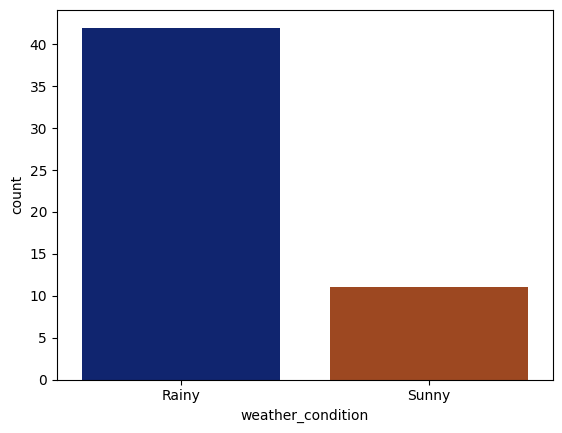

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="weather_condition",data=rf, palette="dark")
plt.show()

Looking above, its clear that the target column are having two variables that are not equal. Hence our dataset is imbalance. In order to balance it we will use Random Oversampling technique. Random oversampling is a technique used to address class imbalance in a dataset by increasing the number of instances in the minority class through random duplication of existing minority class samples. This approach aims to balance the class distribution by ensuring that all classes have approximately the same number of samples. Python libraries such as imbalanced-learn provide implementations of random oversampling techniques. For example, you can use the RandomOverSampler class from imbalanced-learn to perform random oversampling:

In [71]:
#Spliting the dataset into feature and target variable.
X = rf.drop('weather_condition', axis=1) # Feature
y = rf['weather_condition'] #Target 

In [72]:
from imblearn.over_sampling import RandomOverSampler
# Apply oversampling using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

In [73]:
rainfall = pd.DataFrame(X_oversampled, columns=X.columns)
rainfall['weather_condition'] = y_oversampled

LABLE ENCODING

In [74]:
# import labelencoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_en= LabelEncoder()

In [75]:
# fit and transfoam the labelencoding
rainfall['weather_condition']= label_en.fit_transform(rainfall['weather_condition'])



In [76]:
rainfall.head()

,rainfall,temperature,humidity,wind_speed,weather_condition
0,12.5,15.2,78.0,8.5,0
1,8.2,17.8,65.0,5.2,0
2,0.0,20.1,52.0,3.1,1
3,3.7,18.6,71.0,6.7,0
4,21.1,14.8,82.0,9.3,0


In [77]:
rainfall['weather_condition'].value_counts()

weather_condition
0    42
1    42
Name: count, dtype: int64

Now both are qeual hence dataset is balance. Lets Proceed further

C:\Users\bhara\AppData\Local\Temp\ipykernel_1132\2508912609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="weather_condition",data=rainfall, palette="Reds")


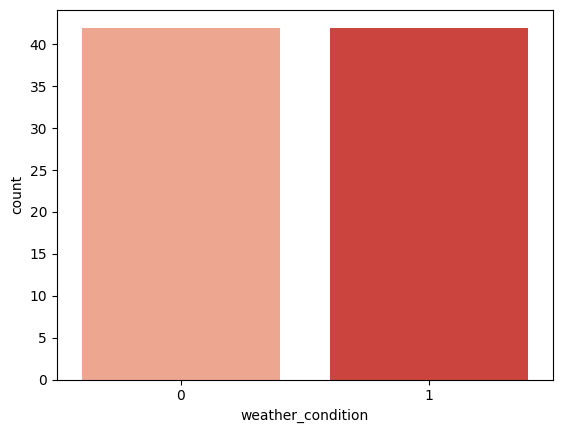

In [78]:
#Viewing the same with graphs
sns.countplot(x="weather_condition",data=rainfall, palette="Reds")
plt.show()

In [79]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(X_oversampled)
x_transform = pre_process.fit_transform(X_oversampled)

In [89]:
rainfall['weather_condition'].unique()

array([0, 1], dtype=int64)

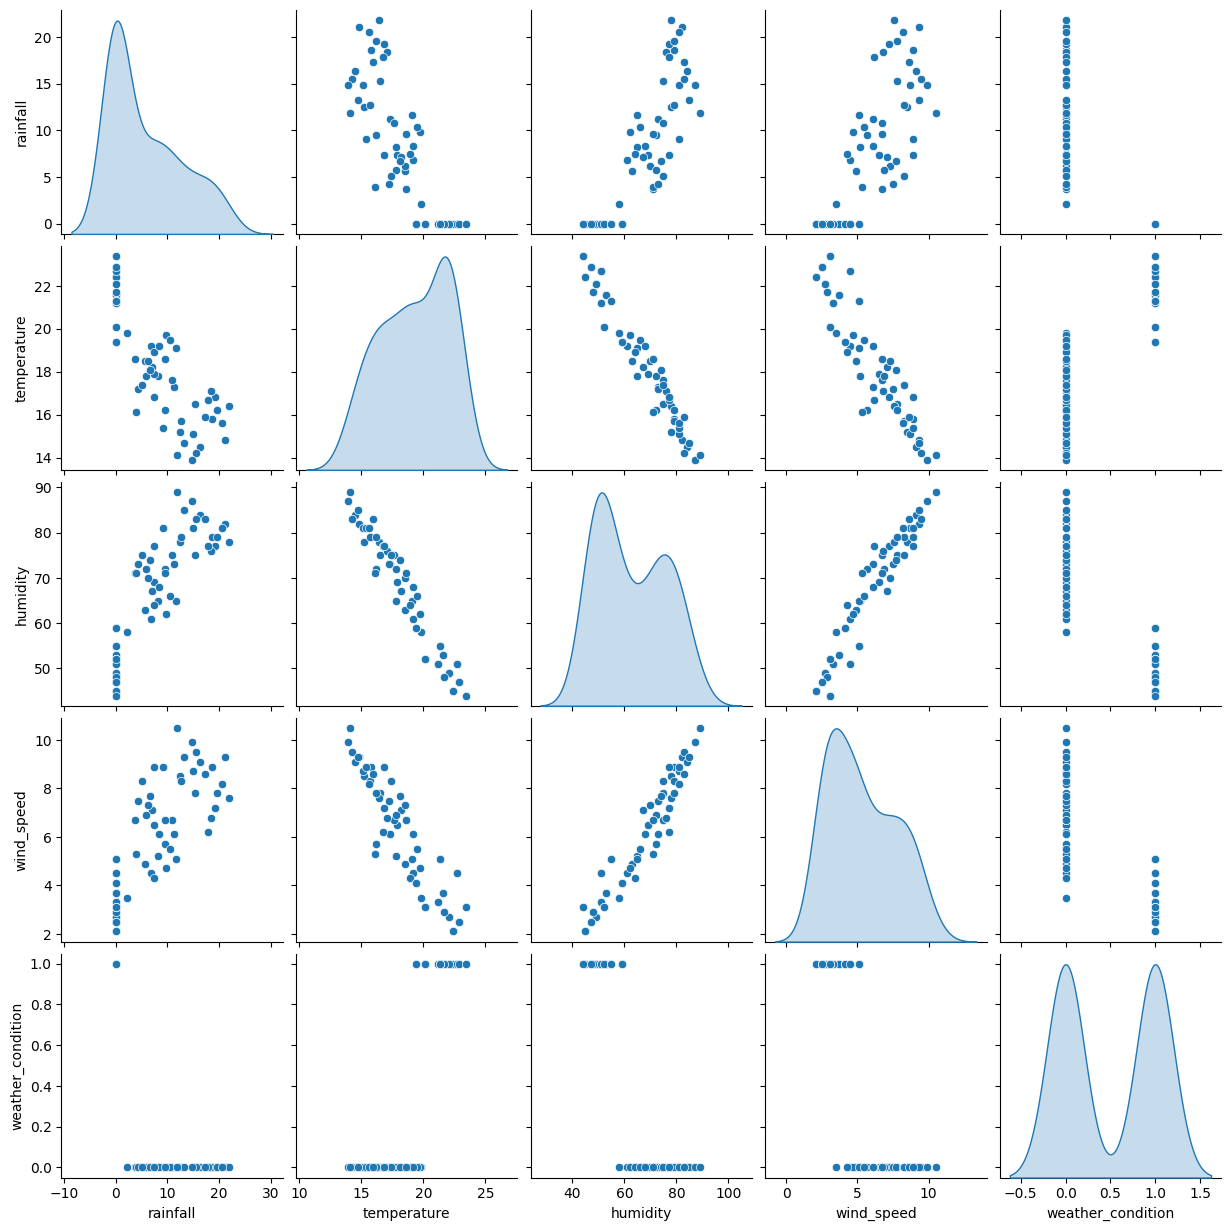

In [90]:
sns.pairplot(rainfall, diag_kind='kde')

In [91]:
rainfall.corr()

,rainfall,temperature,humidity,wind_speed,weather_condition
rainfall,1.000000,-0.850922,0.879554,0.813033,-0.833173
temperature,-0.850922,1.000000,-0.973051,-0.908834,0.853283
humidity,0.879554,-0.973051,1.000000,0.958597,-0.885802
wind_speed,0.813033,-0.908834,0.958597,1.000000,-0.808446
weather_condition,-0.833173,0.853283,-0.885802,-0.808446,1.000000


In [85]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(X_oversampled)
x_transform = pre_process.fit_transform(X_oversampled)

In [94]:
y_oversampled.shape

(84,)

In [93]:
X_oversampled.shape

(84, 4)

In [92]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y_oversampled, test_size = .30, random_state = 42)

In [96]:
x_train.shape

(58, 4)

In [98]:
from sklearn.naive_bayes import GaussianNB
Naive_bayes = GaussianNB()

Naive_bayes.fit(x_train,y_train)

GaussianNB()

In [100]:
y_pred = Naive_bayes.predict(x_test)

y_pred

array(['Sunny', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy',
       'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Sunny',
       'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Rainy',
       'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Sunny'], dtype='<U5')

In [104]:
#Create Confusion Metrix
from sklearn import metrics

cnf_metrics = metrics.confusion_matrix(y_test,y_pred)
cnf_metrics  

array([[16,  0],
       [ 0, 10]], dtype=int64)

<Axes: >

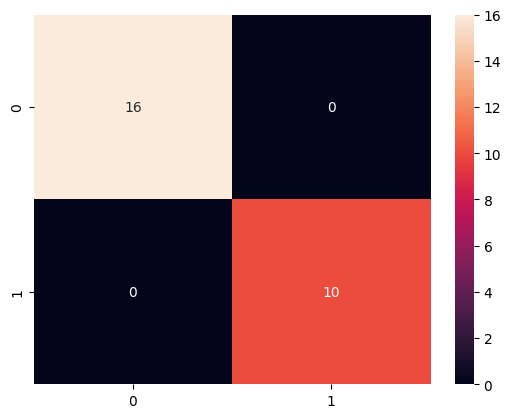

In [105]:
#print Metrics

sns.heatmap(cnf_metrics, annot=True)

In [106]:
#print model accuracy

print('Accuracy:' ,metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [111]:
precision = precision_score(y_test, y_pred, pos_label='Rainy', average='binary')

recall = recall_score(y_test, y_pred, pos_label='Rainy', average='binary')

f1 = f1_score(y_test, y_pred, pos_label='Rainy', average='binary')

In [113]:
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
#print(classification_report(y_test_decoded, y_pred_decoded, target_names=label_encoder.classes_))
print(classification_report(y_test, y_pred, target_names=['Rainy', 'Sunny',]))

Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
              precision    recall  f1-score   support

       Rainy       1.00      1.00      1.00        16
       Sunny       1.00      1.00      1.00        10

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



# Conclusion

### Perfect Classification: model has classified all instances in the dataset correctly. Every positive prediction is correct, and all actual positive instances have been identified.
### Possible Data Issues: While perfect scores are theoretically possible, they are rare in real-world scenarios. This could indicate potential issues with the data: like overfitting or Easy Dataset which lacking variability or complexity.
### NB - in order to balance the dataset I have used Random Oversampling method. I will try to build another model with same dataset without this technique to see the variaation in result.
